# Basic_Preprocessing

## Download sample data

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

In [2]:
!gdown 1op55Vwx7quF0UoNbJ18GmSx_CoCjILaN

Downloading...
From: https://drive.google.com/uc?id=1op55Vwx7quF0UoNbJ18GmSx_CoCjILaN
To: /content/imgset_mini.zip
100% 83.2k/83.2k [00:00<00:00, 54.2MB/s]


In [3]:
!unzip imgset_mini.zip

Archive:  imgset_mini.zip
  inflating: airplane.jpg            
  inflating: car.jpg                 
  inflating: dog.jpg                 


In [4]:
img_path = '/content/airplane.jpg'

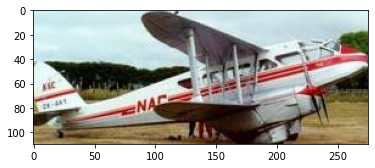

In [5]:
img = cv2.imread(img_path)

# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # 색상 채널순서 변경

## Resize

In [6]:
img = cv2.imread(img_path)
img.shape

(110, 275, 3)

(102, 256, 3)

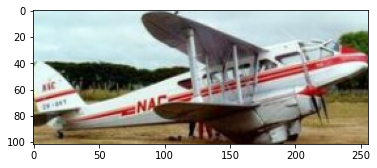

In [7]:
# 이미지의 width와 height 중 긴 쪽을 img_size에 맞추기
img_size = 256

# resize할 때 큰쪽을 img_size에 맞춰야하기 때문
if(img.shape[1] > img.shape[0]) : # 가로가 더 클 때
    ratio = img_size/img.shape[1]
else : # 세로가 더 클 때
    ratio = img_size/img.shape[0]

img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR) # interpolation 1,2,3 보간법 기억
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

cv2.resize
- dsize : dsize에 원하는 사이즈를 입력하거나, 
- fx, fy : dsize에 (0,0)주고, fx, fy에 비율을 입력하면 원하는 사이즈로 resize할 수 있다.
- interpolation : 크기를 변경할 때 어떤 보간법을 쓸지 정할 수 있다.
    1. cv2.INTER_NEAREST - 최근방 이웃 보간법 : 가장 빠르지만 퀄리티가 많이 떨어져 잘 쓰이지 않습니다.

    2. cv2.INTER_LINEAR - 양선형 보간법(2x2 이웃 픽셀 참조) : 속도도 빠르고 퀄리티도 적당하다.

    3. cv2.INTER_CUBIC - 3차회선 보간법(4x4 이웃 픽셀 참조) : cv2.INTER_LINEAR 보다 느리지만 퀄리티는 더 좋다.

    4. cv2.INTER_LANCZOS4 - Lanczos 보간법 (8x8 이웃 픽셀 참조) : 좀더 복잡해서 오래 걸리지만 퀄리티는 좋다.

    5. cv2.INTER_AREA - 영상 축소시 효과적 : 영역적인 정보를 추출해서 결과 영상을 셋팅

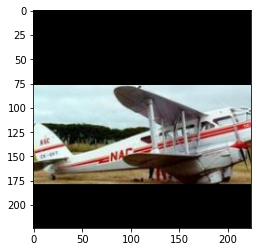

In [8]:
# 그림 주변에 검은색으로 칠하기
w, h = img.shape[1], img.shape[0]

dw = (img_size-w)/2 # img_size와 w의 차이
dh = (img_size-h)/2 # img_size와 h의 차이

M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  

cv2.imwrite('resized_img.jpg' , img_re)

plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

In [9]:
os.mkdir('resized')

In [10]:
images = []

for filename in ['airplane', 'car', 'dog']:
    img_path = '/content/'+filename+'.jpg'
    print(img_path)
    img = cv2.imread(img_path)
    img_size = 224

    if(img.shape[1] > img.shape[0]) : 
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

    # 그림 주변에 검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  

    cv2.imwrite('resized/{}.jpg'.format(filename) , img_re)
    images.append(img_re)

/content/airplane.jpg
/content/car.jpg
/content/dog.jpg


In [ ]:
images

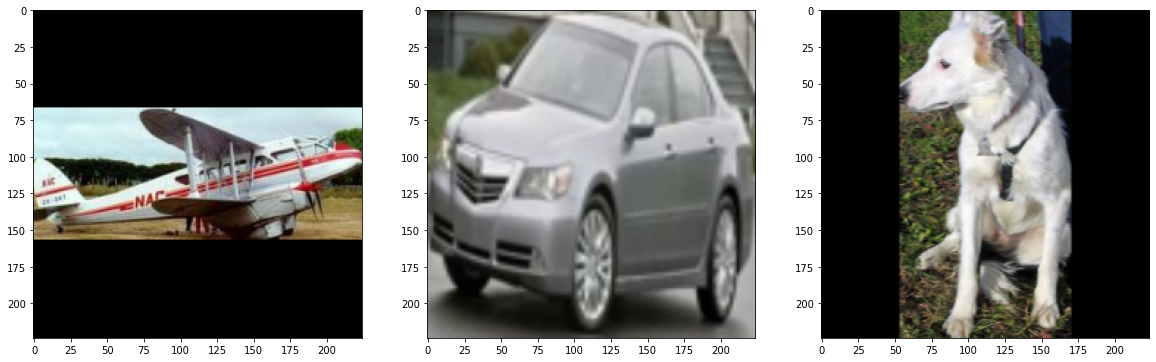

In [13]:
plt.figure(figsize=(20,10))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Zero Centering
: 데이터 평균을 빼서 평균이 0이 되게,,,    
(음수 범위와 양수 범위가 비슷해짐)

In [14]:
# zero-centering
compute_mean = lambda imgs : np.mean(imgs, axis=0)

def compute_mean(imgs):
    return np.mean(imgs, axis = 0)

In [15]:
mean_img = compute_mean(images)

In [16]:
mean_img.shape

(224, 224, 3)

In [17]:
zero_centered_images = images - mean_img

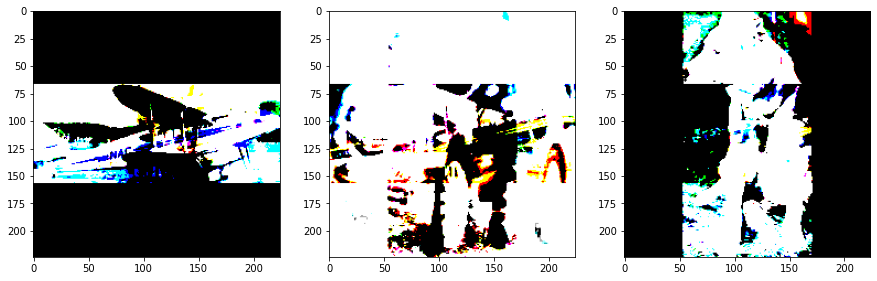

In [18]:
plt.figure(figsize=(15,5))

for idx, zc_img in enumerate(zero_centered_images):
    plt.subplot(1,3,idx+1)
    plt.imshow(zc_img)

## Grayscaling & Binarization

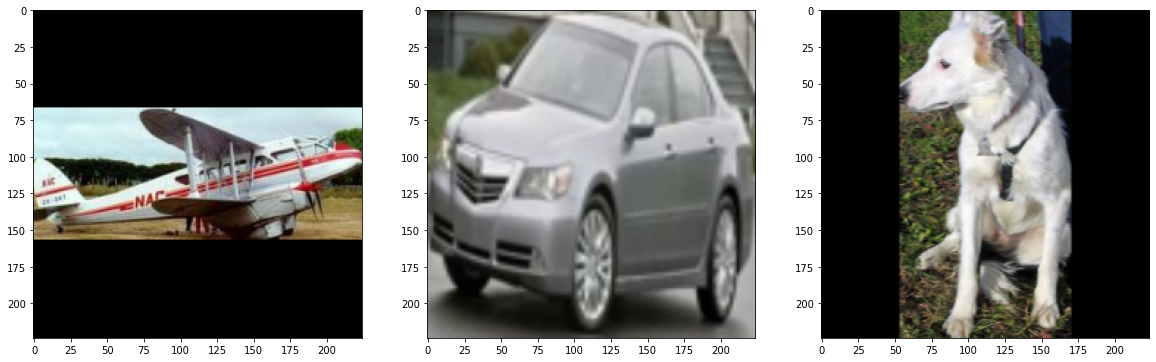

In [20]:
plt.figure(figsize=(20,10))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [21]:
grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
gray_imgs = [grayscale(img) for img in images]
gray_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 25,  25,  26, ..., 212, 212, 212],
        [ 27,  27,  28, ..., 209, 213, 215],
        [ 32,  32,  32, ..., 200, 216, 222],
        ...,
        [147, 146, 144, ..., 163, 165, 166],
        [148, 148, 146, ..., 162, 164, 165],
        [149, 148, 146, ..., 162, 164, 165]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [23]:
# gray image는 차원이 축소된 것을 확인할 수 있다.
gray_imgs[0].shape

(224, 224)

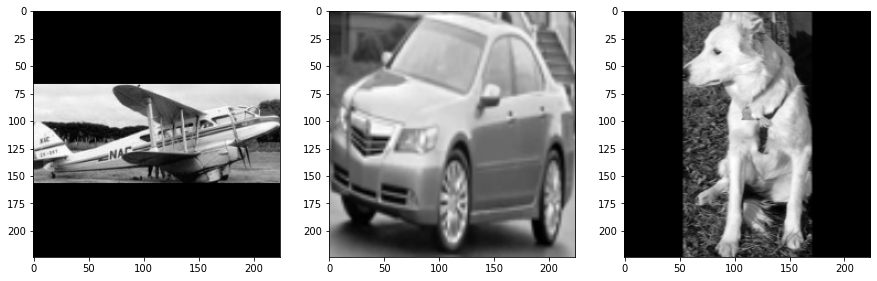

In [24]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(gray_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

In [27]:
thresh = 127 
binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY_INV) # binary / binary_inv : 0 or 1

In [28]:
bin_imgs = [binarization(img)[1] for img in gray_imgs]
bin_imgs

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]

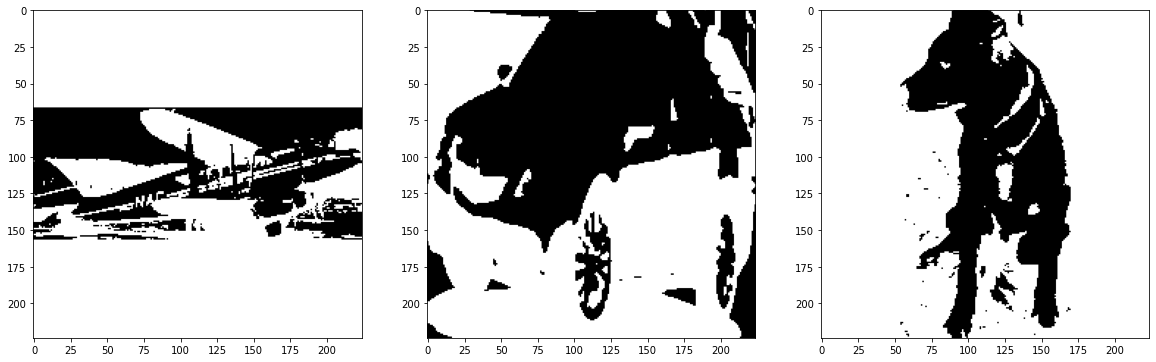

In [29]:
plt.figure(figsize=(20,10))

for idx, img in enumerate(bin_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')